#### Bagging 기법
    RandomForest는 Bagging방식을 적용한 알고리즘이다.
    Bagging방식으로 각자의 데이타를 샘플링해서 개별적으로 학습한 후 최종적으로 투표를 통해서 가장 보편적인 예측결정을 하게 된다.
    
    Bagging은 Bootstrap Aggregation을 줄인 말이다. 
    
    사이킷런은 RandomForestClassifier클래스를 통해서 랜덤포레스트 기반의 분류를 지원한다

### Iris Dataset Load

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state = 42)

### RandomForest Model Generator

In [10]:
from sklearn.ensemble import RandomForestClassifier
'''

RandomForestClassifier

n_estimator = 100
디시즌트리가 100개 있어야 한다...
estimator, 100개의 평가자가 있어야 한다.
100개의 평가자들을 평균, 다수결의 원칙을 예측 결과로 내어놓을 것이다.
'''
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Accuracy 측정하기
1. 직접 측정하기
2. 사용자 함수 정의해서 측정하기
3. 라이브러리 이용해서 측정하기 score(), accuracy_score()
4. Confusion Metrix

In [11]:
#1. 
pred = rf.predict(X_test)
print(pred)
print(y_test)

[0 1 1 1 0 1 1 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 2 2 2 0 0 0 0 2
 1]
[0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


In [12]:
#2개의 리스트값을 병행해서 살펴볼 대... zip()
y_tuple = list(zip(y_test, pred))
y_tuple

[(0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1)]

In [13]:
#2.
for a, b in y_tuple:
    if not a==b:
        print('unmatched : (y_test, pred)=(',a,',',b,')')

unmatched : (y_test, pred)=( 2 , 1 )
unmatched : (y_test, pred)=( 2 , 1 )
unmatched : (y_test, pred)=( 1 , 2 )


In [14]:
len(y_test)

38

In [15]:
#3. accuracy_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
accuracy

0.9210526315789473

#### Confusion Matrix

In [16]:
# 일단 샘플데이타로 confusion Matrix를 실습해본다....
from sklearn.metrics import confusion_matrix
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

#confusion_matrix 이차원 행렬로 나온다
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [19]:
a = ['cherry', 'apple', 'apple', 'banana', 'cherry']
b = ['banana', 'apple', 'apple', 'banana', 'apple']

confusion_matrix(a,b)

array([[2, 0, 0],
       [0, 1, 0],
       [1, 1, 0]], dtype=int64)

In [20]:
a = ['cherry', 'apple', 'apple', 'banana', 'cherry']
b = ['banana', 'apple', 'apple', 'banana', 'apple']

confusion_matrix(a,b, labels=['cherry', 'banana', 'apple'])

array([[0, 1, 1],
       [0, 1, 0],
       [0, 0, 2]], dtype=int64)

In [21]:
confusion_matrix(y_test, pred)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 11]], dtype=int64)

#### DataFrame Visualization

In [28]:
cm = pd.DataFrame(confusion_matrix(y_test,pred), columns=iris.target_names, index=iris.target_names)
cm

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,12,1
virginica,0,2,11


### Heatmap Visualization

In [27]:
import seaborn as sns

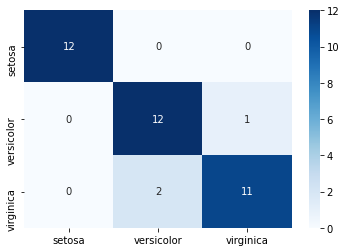

In [29]:
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.show()